In [3]:
#Python Initiation
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline
import pandas as pd
import ipywidgets as widgets
import time
import math
from IPython.display import display

#Graph Formatting
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 14
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
Res=100 #Resoultion of the calulations

#Graph Font Edit
font = {'family':'Times New Roman',
        'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('font', **font)


Thrust at altitude: [194600.         197326.784016   202582.72053392 205865.96153584
 212420.37812368 218123.74852854 218711.83258942 218730.33953798
 218730.82437635 218730.8317022 ]
Specific Impulse at altitude: [254.         257.55911172 264.41937829 268.70480077 277.25989745
 284.70417331 285.47176504 285.49592108 285.49655391 285.49656348]


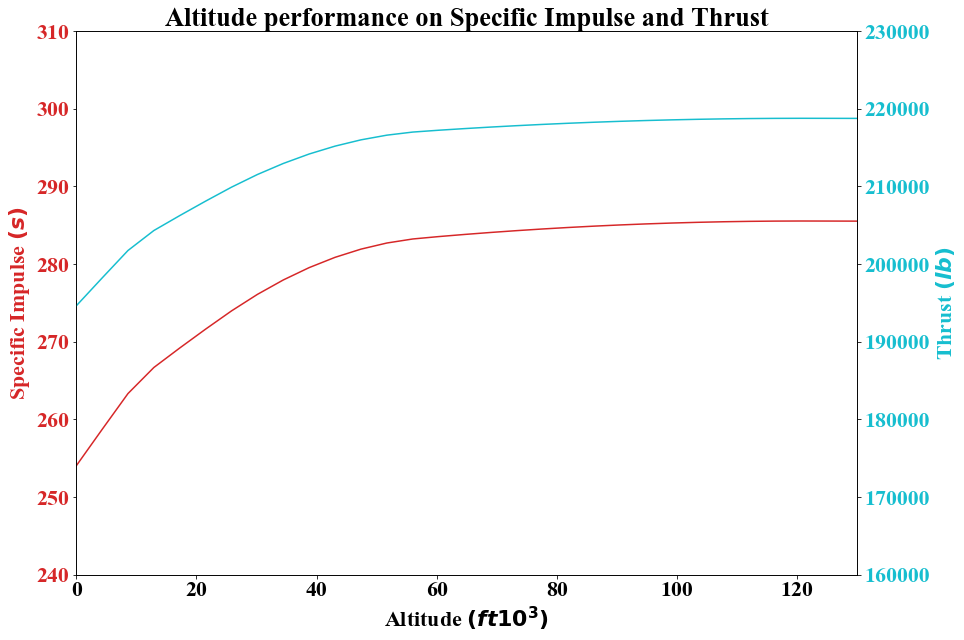

In [4]:
#Homework 2

#Given
P2=8.66   #Pressure | psia (assume constant with altitude)
F=194600  #Sea-level Thrust | lbs
Isp=254   #Specific Impulse Sea-level | seconds
A2=1642   #Area | inches^2
go=32.2   #Gravity| ft/sec^2
P3=14.696 #Standard Sea-level Pressure | psia

#Calculations
C=Isp*go
mdot=F/C                   #Use F and C
wdot=mdot*go               #use mdot and go
V2=(F-((P2-P3)*A2))/mdot   #at sea-level from F, mdot, P2,P3, and A2
#Assume mdot and v2 remain constant with altitude, vary P3 with altitude; Calculate and plot F
#Calculate and plot Specific Impulse at any altitude from F and wdot


Px=P3*np.array([1,8.87*10**-1,6.6919*10**-1,5.3313*10**-1,2.6151*10**-1,2.5158*10**-2,7.8735*10**-4,2.0408*10**-5,3.1593*10**-7,1.2341*10**-8])
Alt=3280.84*np.array([0,1,3,5,10,25,50,75,100,130])
F=mdot*V2+(P2-Px)*A2
Isp=F*(1/wdot)

#Refining Data
Alt_=np.linspace(Alt.min(), Alt.max(), Res)
FNew= make_interp_spline(Alt,F, k=2)
IspNew= make_interp_spline(Alt, Isp, k=2)
F_s=FNew(Alt_)
Isp_s=IspNew(Alt_)
Alt_=Alt_/1000

#Outputs

print("Thrust at altitude:",F)

print("Specific Impulse at altitude:",Isp)

#plt.plot()

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel("Altitude $(ft10^3)$")
ax1.set_ylabel("Specific Impulse $(s)$", color=color)
ax1.plot(Alt_,Isp_s,color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([240, 310])
plt.xlabel("Altitude $(ft10^3)$")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:cyan'
ax2.set_ylabel("Thrust $(lb)$", color=color)  # we already handled the x-label with ax1
ax2.plot(Alt_,F_s,color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([160000, 230000])

plt.xlim(0,130)
plt.title("Altitude performance on Specific Impulse and Thrust")
#fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()